## HMM算法
```
HMM算法包含两种序列：观测序列和隐状态序列，其中隐状态序列可以视为事务发展的规律，即是事务状态变化规律，状态不同则表现形式就会不一样。从哲学的角度来看，隐状态序列和观测状态序列就是本质和现象的一种关系。

隐藏状态之间会发生状态转换，转换规律符合状态转移矩阵。
由隐藏状态可以生成观测序列，观测序列生成矩阵。
```
<img src="HMM算法模型.png" style='zoom:50%' >
<img src="HMM算法.png" style='zoom:50%' >

In [1]:
import numpy as np
from hmmlearn import hmm

隐藏状态：3个盒子

In [2]:
states = ["box 1", "box 2", "box3"]
n_states = len(states)

观测状态：2种球

In [3]:
observations = ["red", "white"]
n_observations = len(observations)

模型参数

In [4]:
start_probability = np.array([0.2, 0.4, 0.4])

transition_probability = np.array([
  [0.5, 0.2, 0.3],
  [0.3, 0.5, 0.2],
  [0.2, 0.3, 0.5]
])

emission_probability = np.array([
  [0.5, 0.5],
  [0.4, 0.6],
  [0.7, 0.3]
])

In [5]:
model = hmm.MultinomialHMM(n_components=n_states)

model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

维特比算法，看到的是[0,1,0]

In [6]:
seen = np.array([[0,1,0]]).T
logprob, box = model.decode(seen, algorithm="viterbi")
print (np.array(states)[box])

['box3' 'box3' 'box3']


predict也可以

In [7]:
box2 = model.predict(seen)
print (np.array(states)[box2])

['box3' 'box3' 'box3']


得到观测序列的概率 ln0.13022≈−2.0385

In [8]:
print (model.score(seen))

-2.038545309915233


## ARIMA算法

```
ARIMA : Autoregressive Integrated Moving Average model  差分整合移动平均算法【时间平稳性变化数据的模型预测】

ARIMA(p,d,q)中，AR是“自回归”，p为自回归项数；MA是“滑动平均”，q为滑动平均项数；d是使之成为平稳序列所做的差分次数（阶数）

ARIMA算法是 AR（自回归算法） MA（移动平均）  I（差分算法）得的综合算法
I： 使数据时间序列平稳
AR：求出时间t之前的p阶有效数据对当前t时刻的基本预测有贡献
MA：求出时间t之前的q阶有效数据对当前t时刻的误差有贡献

I 差分算法：对t时刻前面的数据进行差分计算，直到数据处于线性平稳状态为止。AR算法的前提是数据随时间序列变化的趋势是线性稳定变化的，但是对于实际数据，其变化均为非线性变化，因此需要进行差分处理，使其数据变为线性稳定变化的数据。(d)

AR自回归算法：对随时间序列变化而线性稳定变化的自相关数据的预测，即使用t时刻前的p阶段有效数据预测t时刻数据：常数项+预测之和+t时刻的误差（p）

p的求解：计算t时刻数据和t时刻前数据分别进行自相关系数计算，如果相关系数大于一定阈值，即可认为该时刻数据对t时刻数据有影响


MA移动平均模型：对于AR算法,误差是累积的，即前面q阶的数据误差都会对t时刻的结果产生影响，那么就需要对在AR自回归模型的基础上 加上移动平均模型以便以降低误差的影响(q)

q的求解：：计算t时刻数据和t时刻前数据分别进行偏自相关系数计算，如果相关系数大于一定阈值，即可认为该时刻数据对t时刻数据有影响

```

In [9]:
from __future__ import absolute_import, division, print_function
import sys
import os
import pandas as pd
import numpy as np

# # Remote Data Access
# import pandas_datareader.data as web
# import datetime
# # reference: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')
# http://www.lfd.uci.edu/~gohlke/pythonlibs/#xgboost
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [12]:
Sentiment = 'sentiment.csv'
Sentiment = pd.read_csv(Sentiment, index_col=0, parse_dates=[0])
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


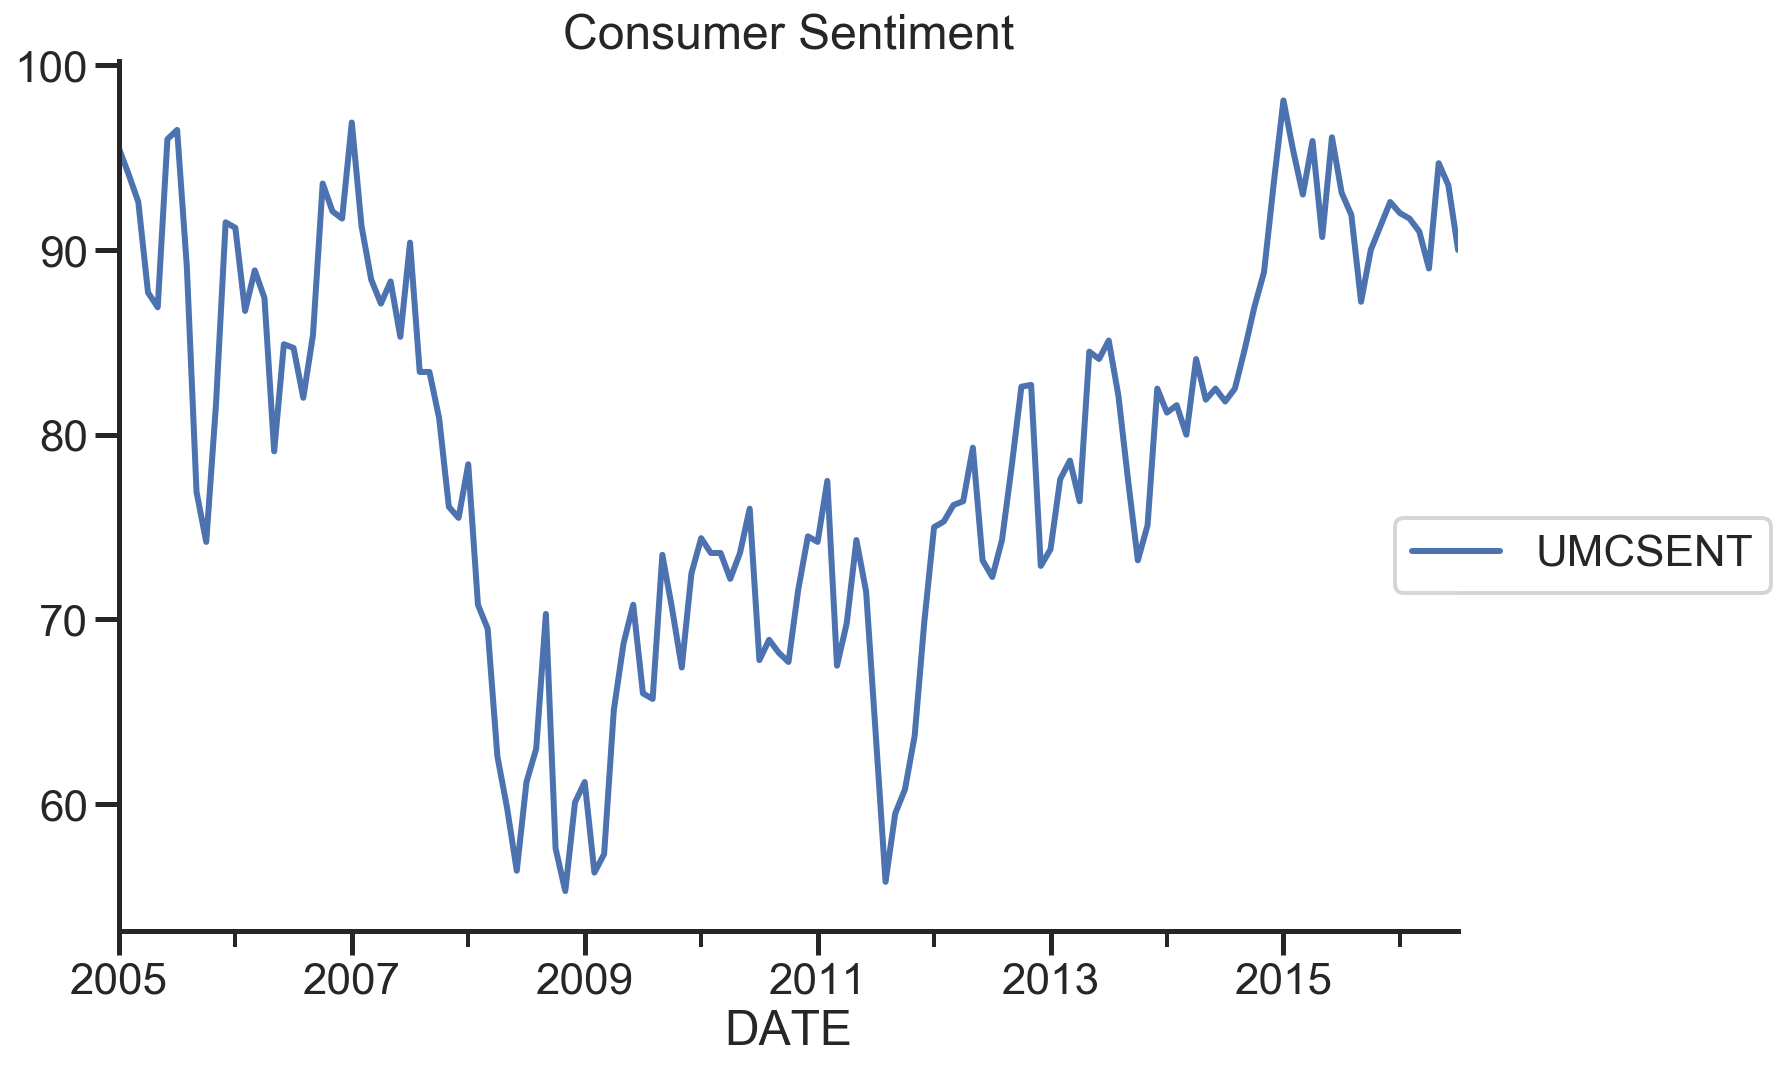

In [13]:
sentiment_short = Sentiment.loc['2005':'2016']
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Consumer Sentiment")
sns.despine()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E792910240>,
      dtype=object)

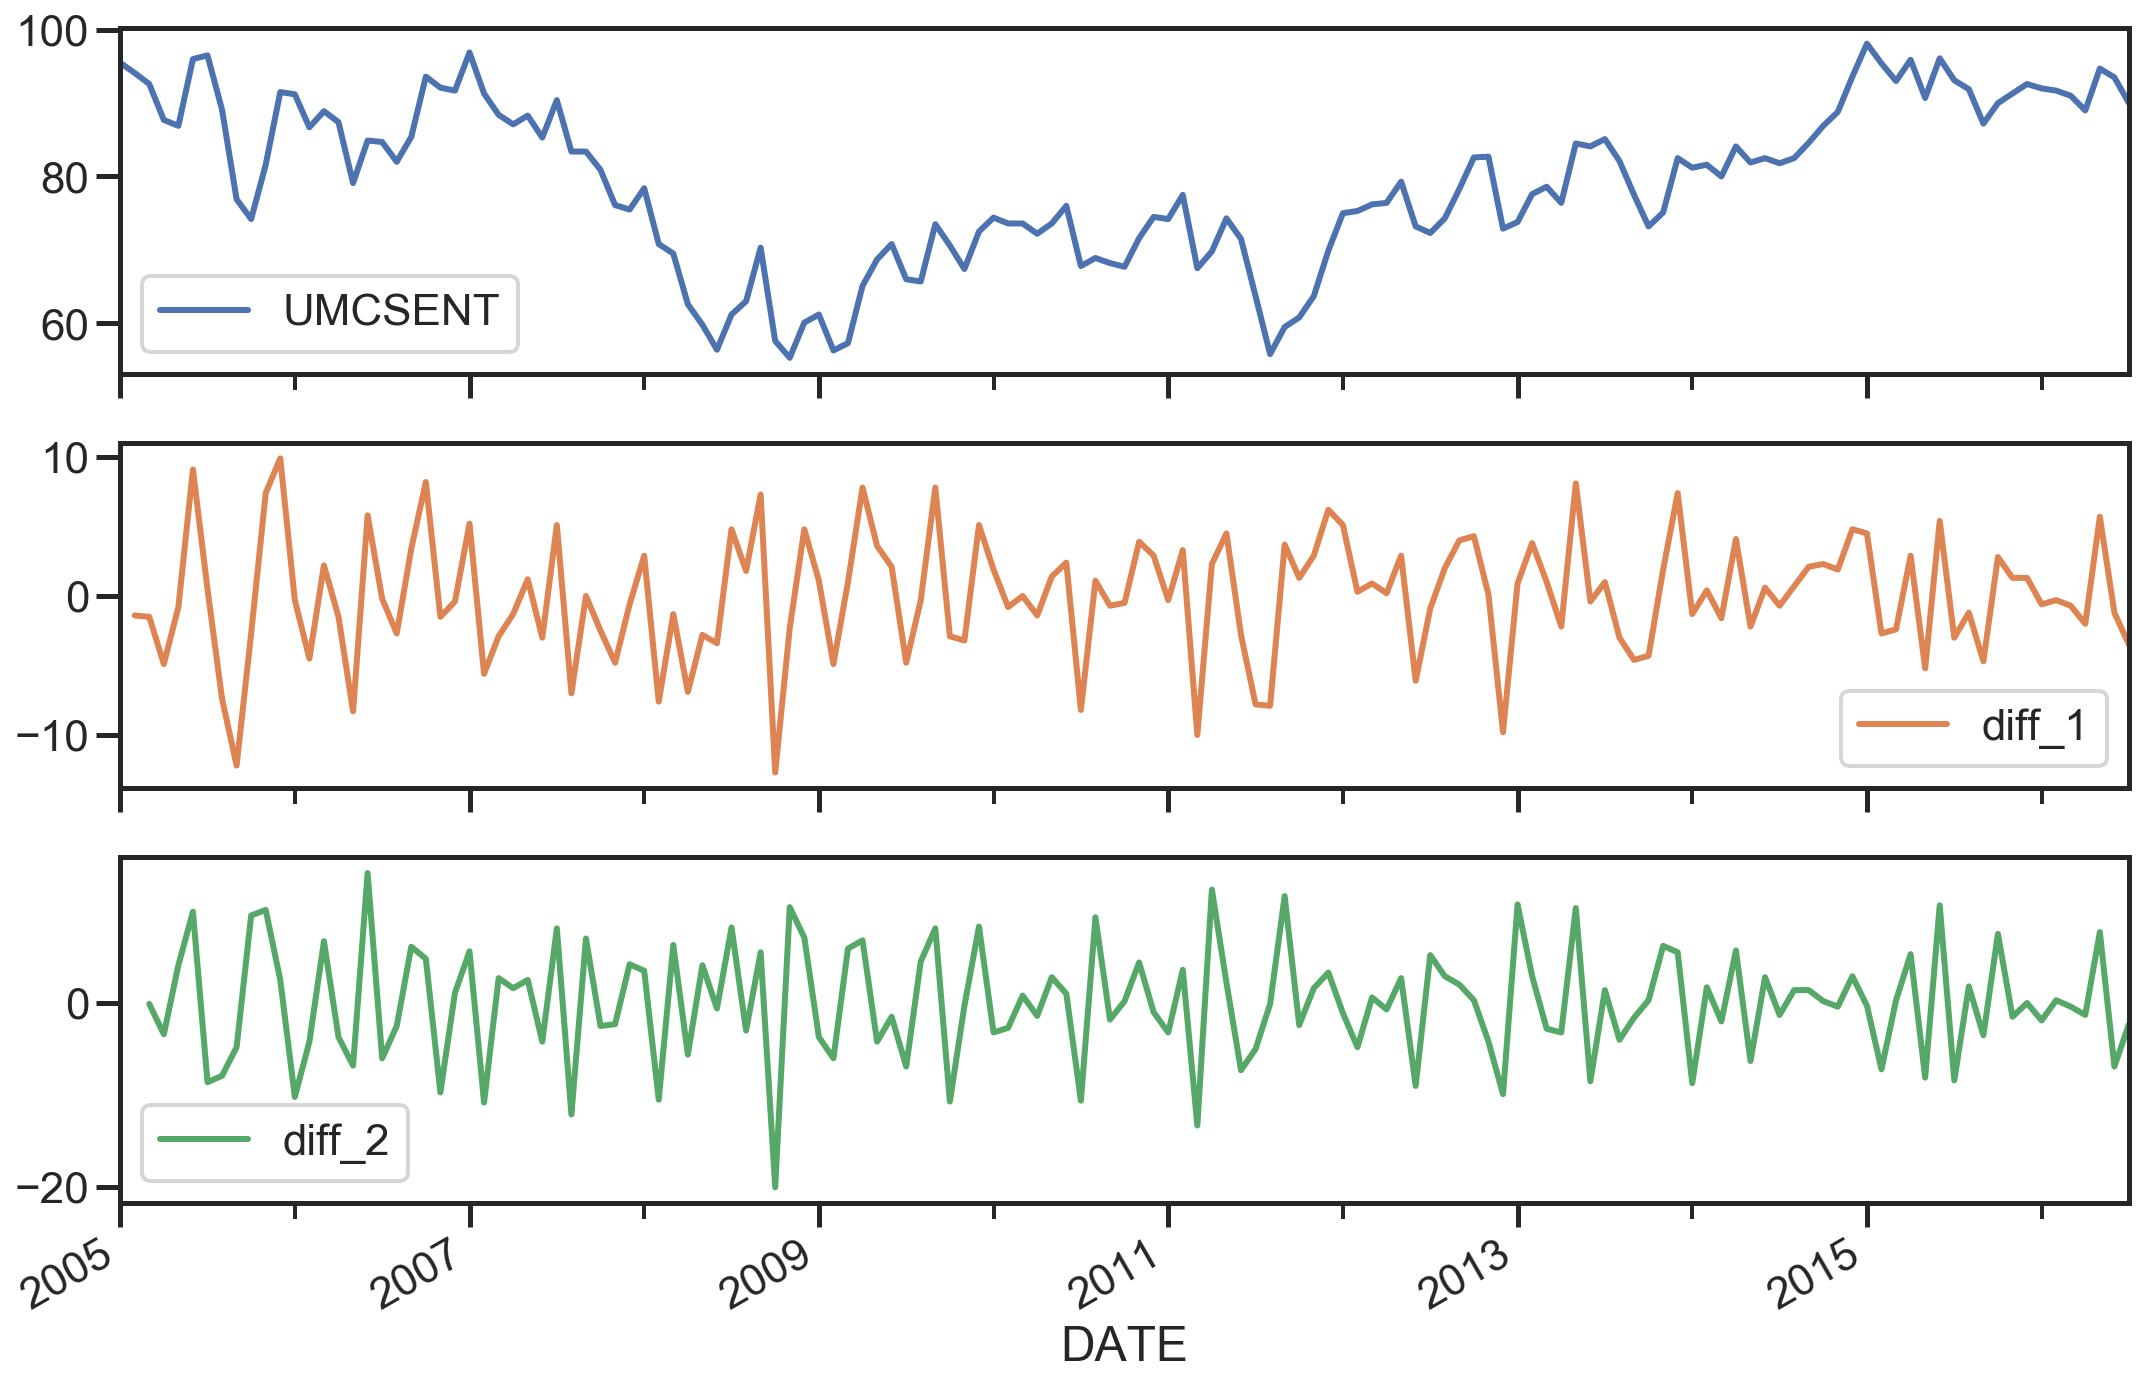

In [14]:
sentiment_short['diff_1'] = sentiment_short['UMCSENT'].diff(1)

sentiment_short['diff_2'] = sentiment_short['diff_1'].diff(1)

sentiment_short.plot(subplots=True, figsize=(18, 12))

In [15]:
del sentiment_short['diff_2']
del sentiment_short['diff_1']
sentiment_short.head()
print (type(sentiment_short))

<class 'pandas.core.frame.DataFrame'>


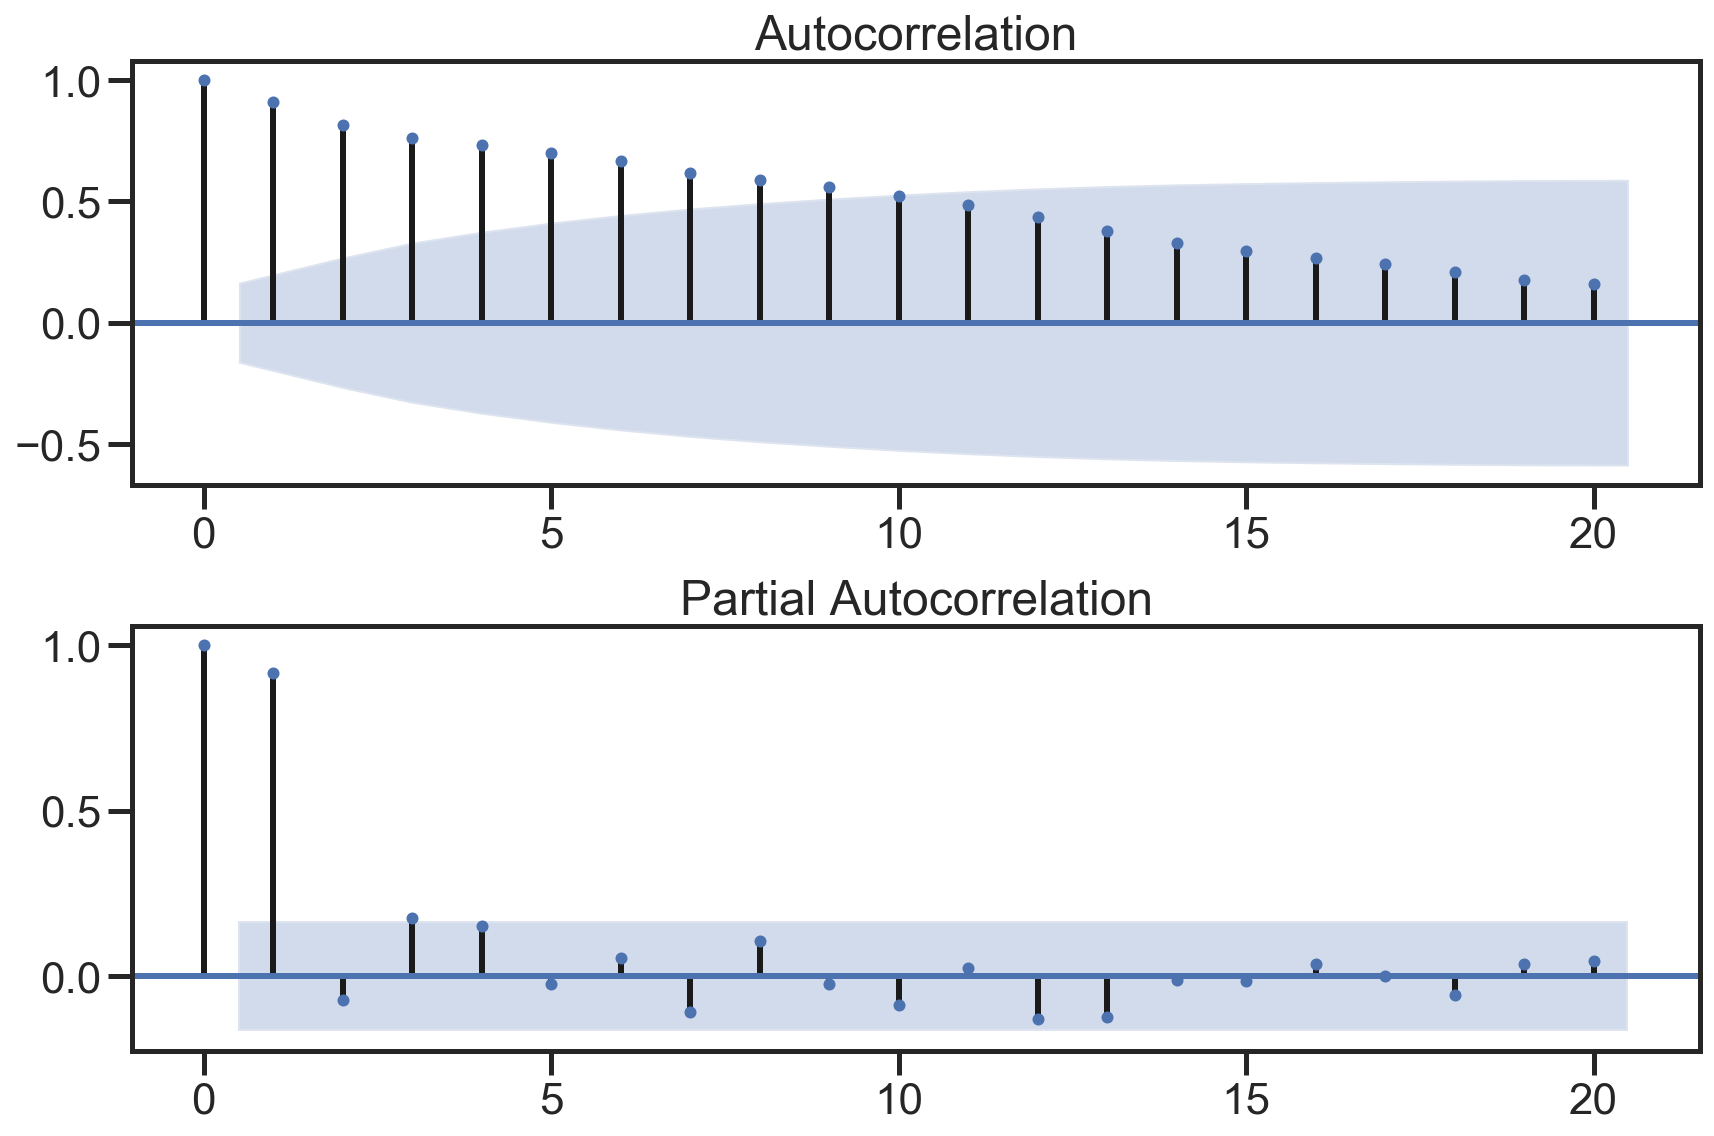

In [17]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
# 求p 
fig = sm.graphics.tsa.plot_acf(sentiment_short, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

#求q
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sentiment_short, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same 

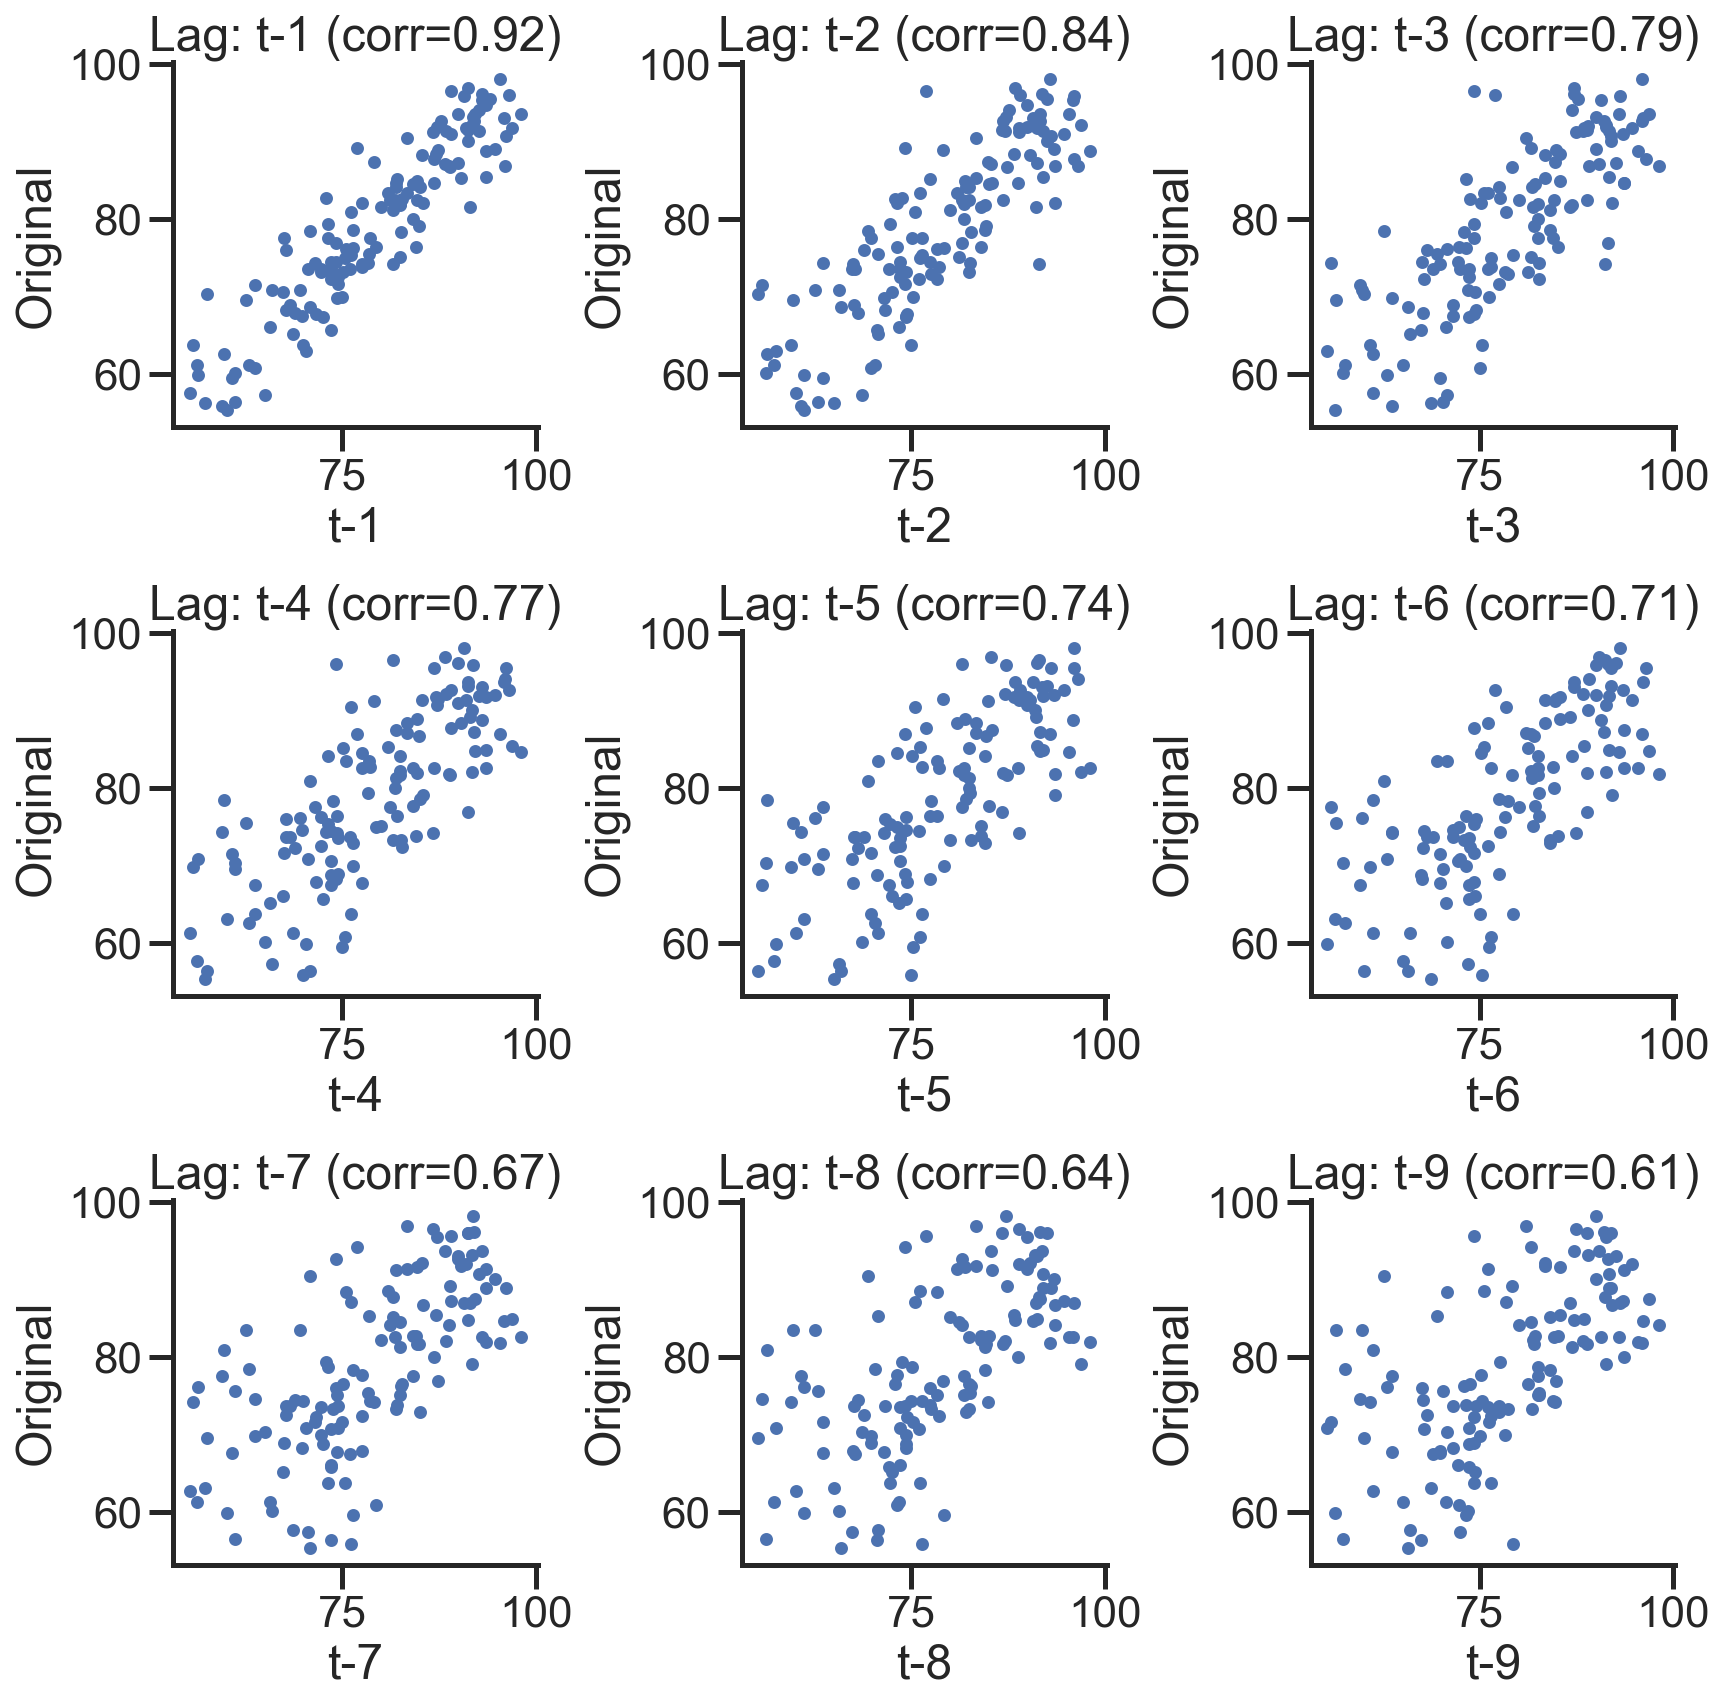

In [18]:
# 散点图也可以表示

lags=9

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([sentiment_short, sentiment_short.shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout()

In [19]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
   
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x1e793644d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e7936ac048>)

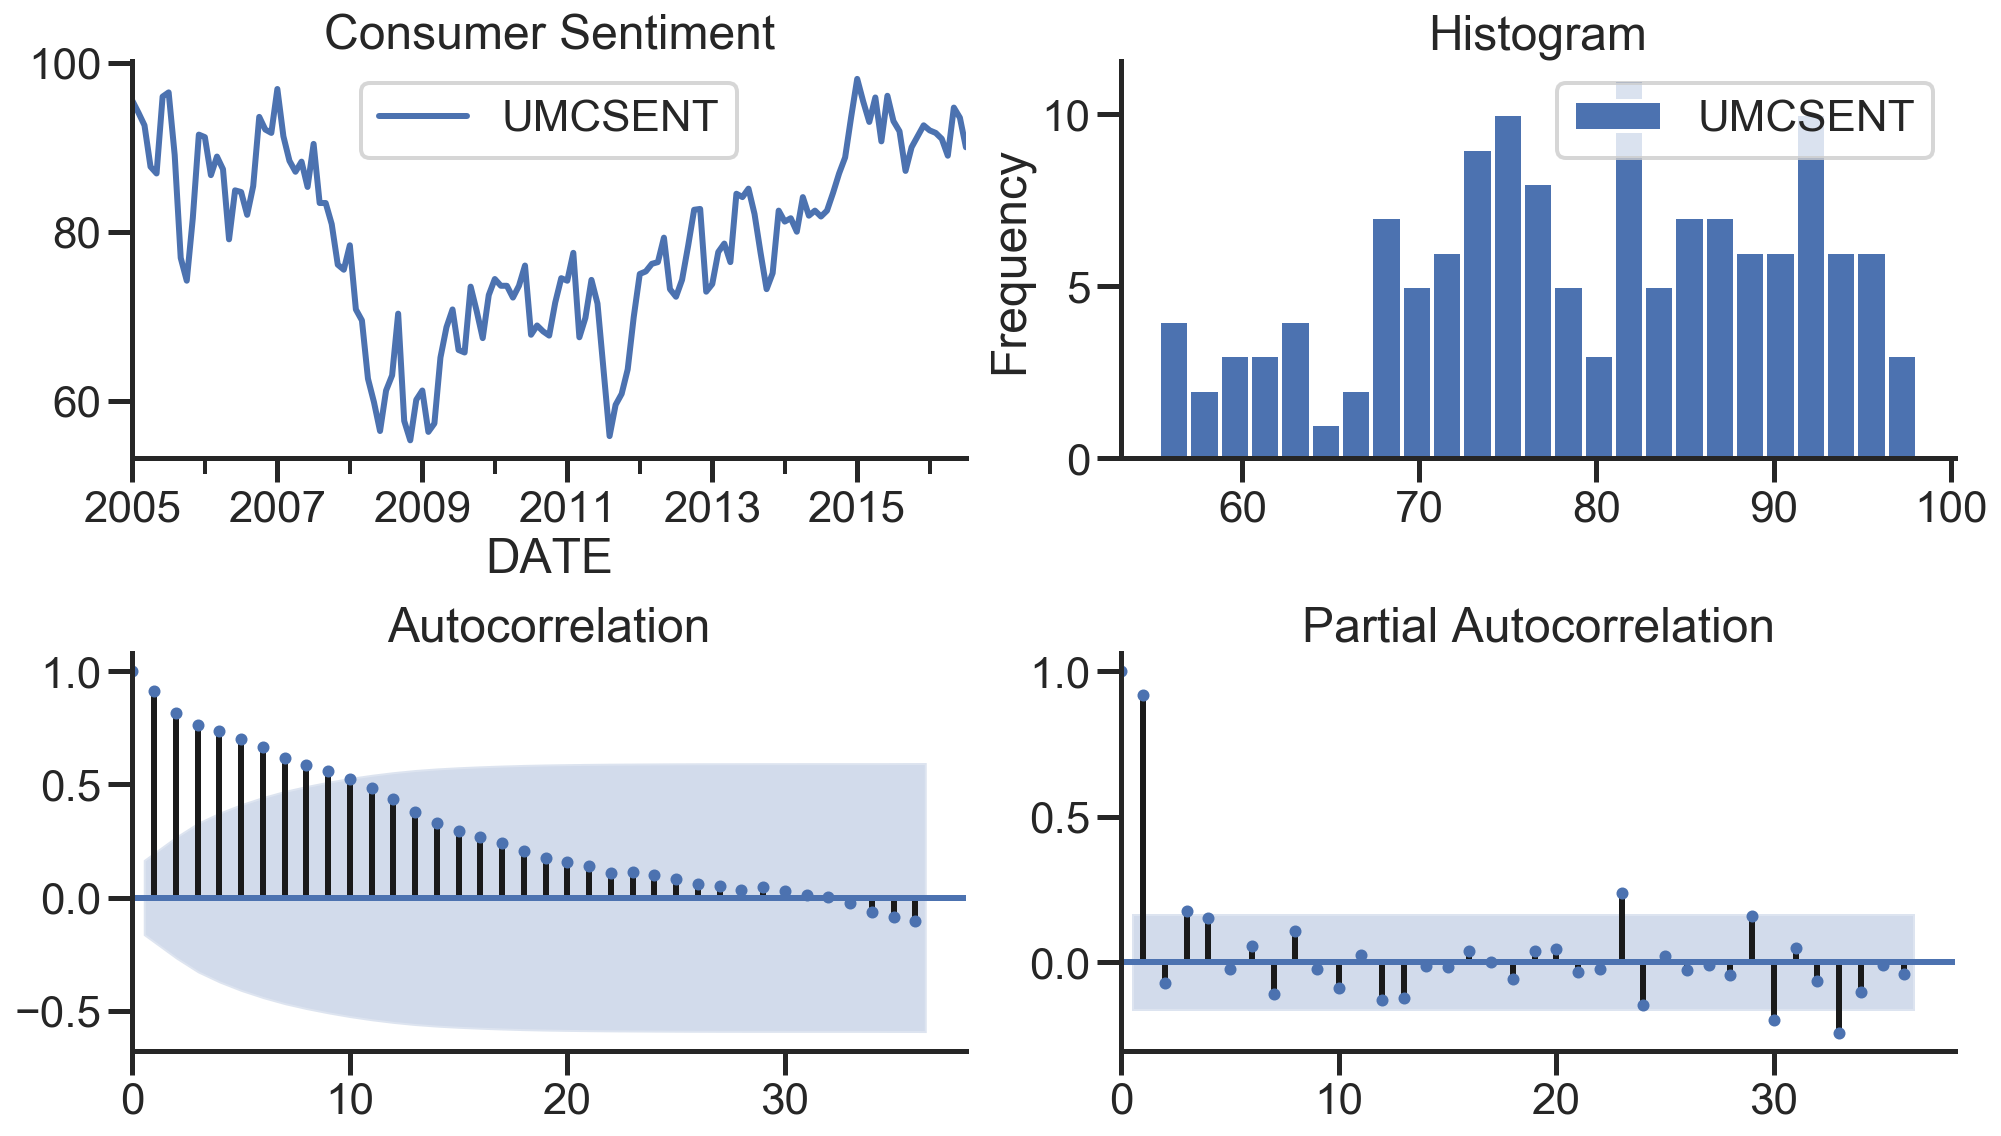

In [20]:
tsplot(sentiment_short, title='Consumer Sentiment', lags=36)

In [23]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [25]:
stockFile = 'T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.49800,6.60300,6.49800,6.54800,0,6.54800
2000-01-04,6.53000,6.54800,6.48500,6.48500,0,6.48500
2000-01-05,6.52100,6.59900,6.50800,6.59900,0,6.59900
2000-01-06,6.55800,6.58500,6.54000,6.54900,0,6.54900
2000-01-07,6.54500,6.59500,6.50400,6.50400,0,6.50400
2000-01-10,6.54000,6.56700,6.53600,6.55800,0,6.55800
2000-01-11,6.60000,6.66400,6.59500,6.66400,0,6.66400
2000-01-12,6.65900,6.69600,6.64500,6.69600,0,6.69600
2000-01-13,6.66400,6.70500,6.61800,6.61800,0,6.61800


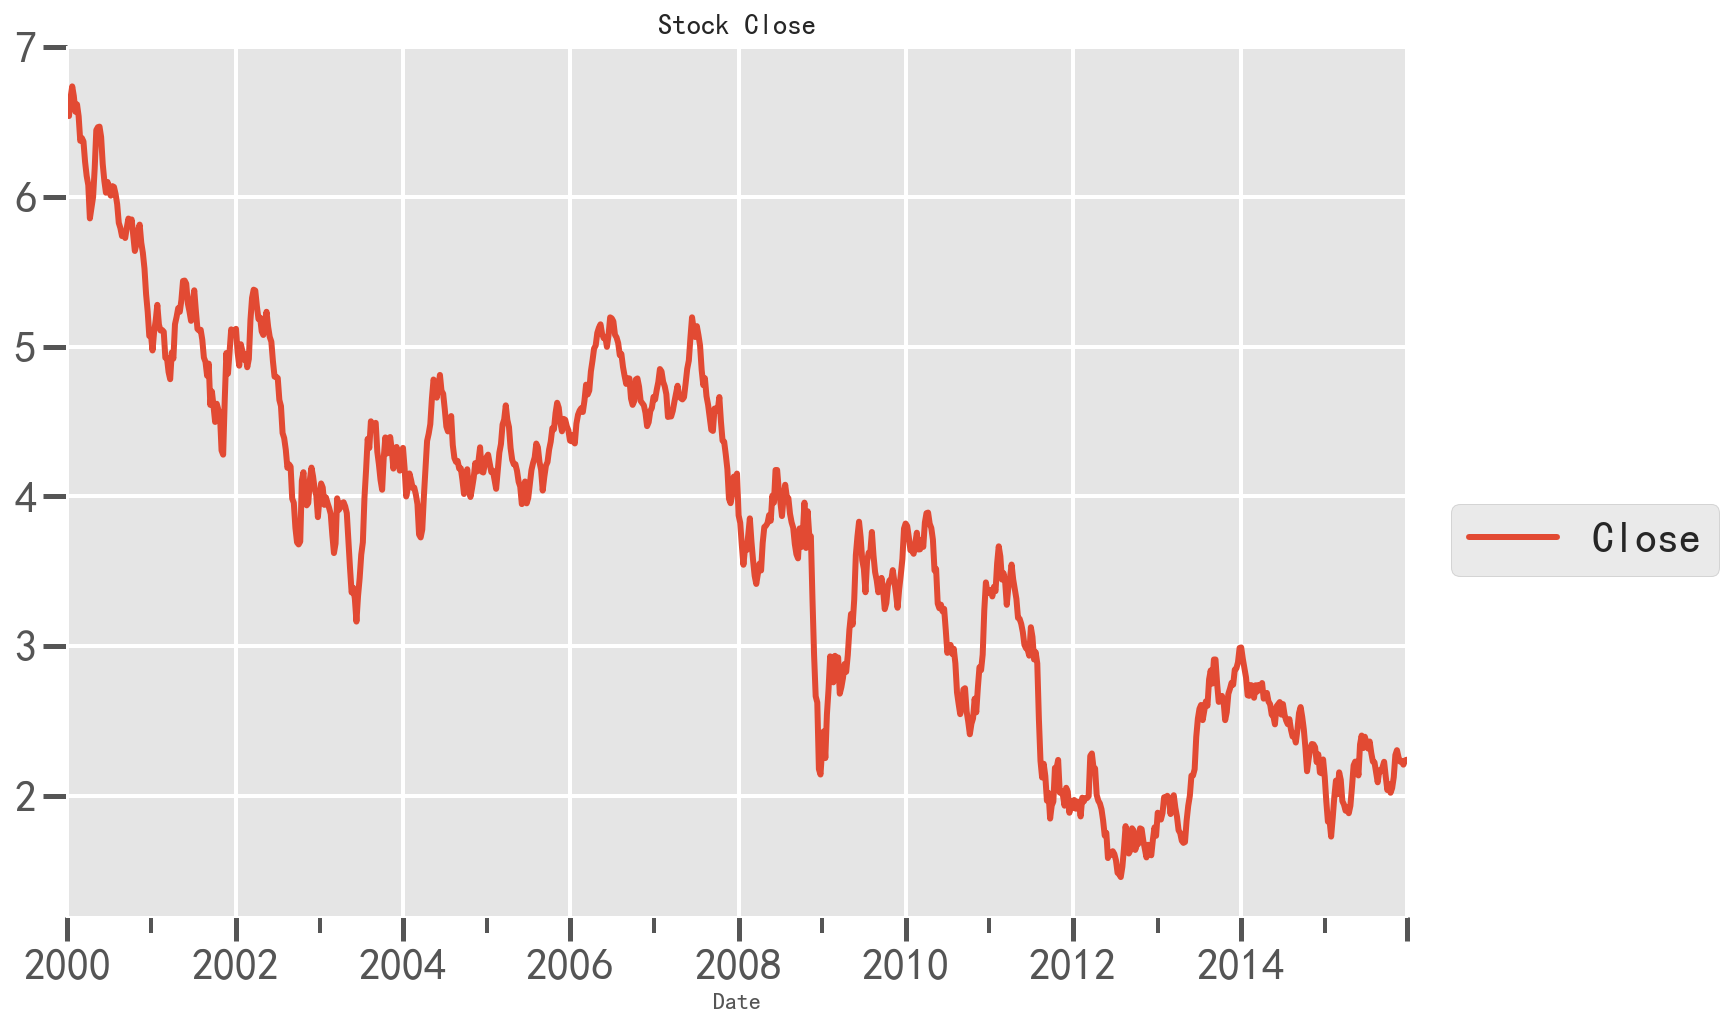

In [26]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

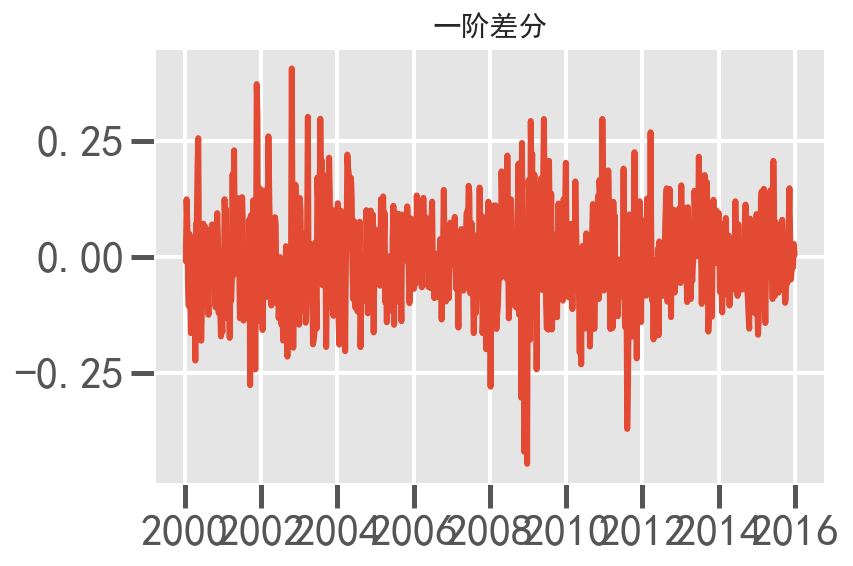

In [27]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


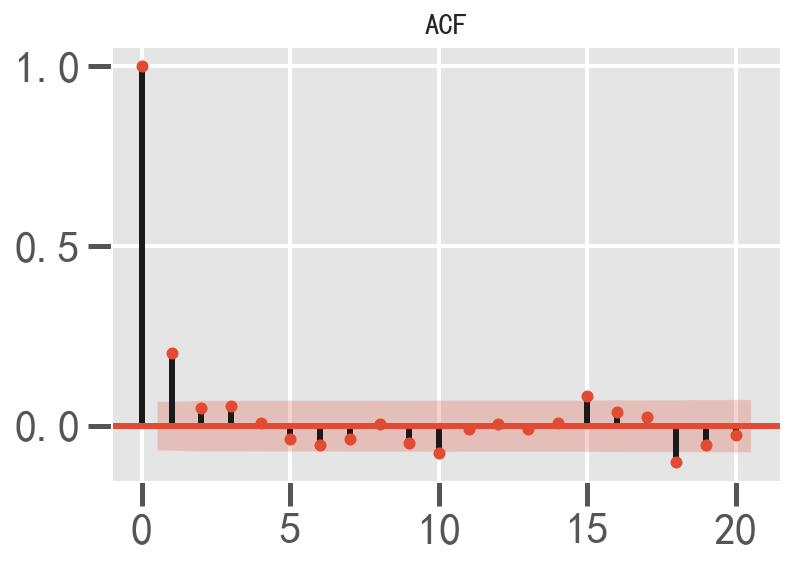

In [28]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


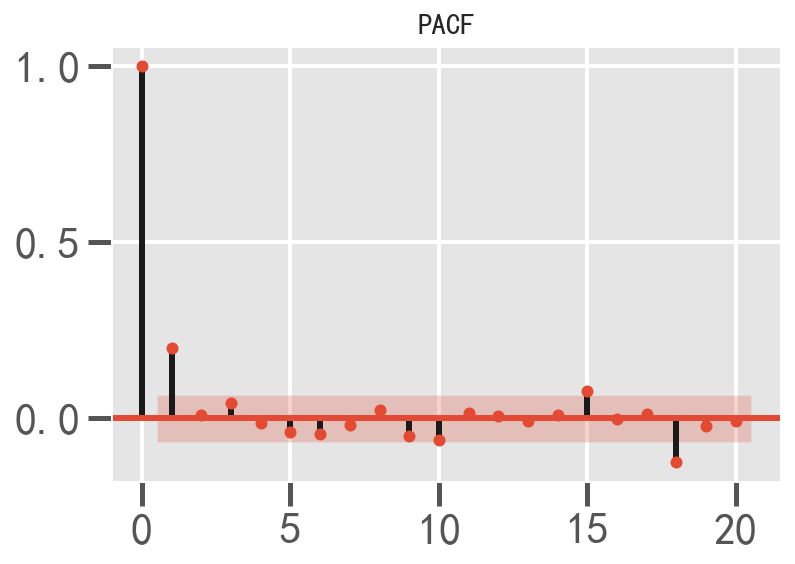

In [29]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

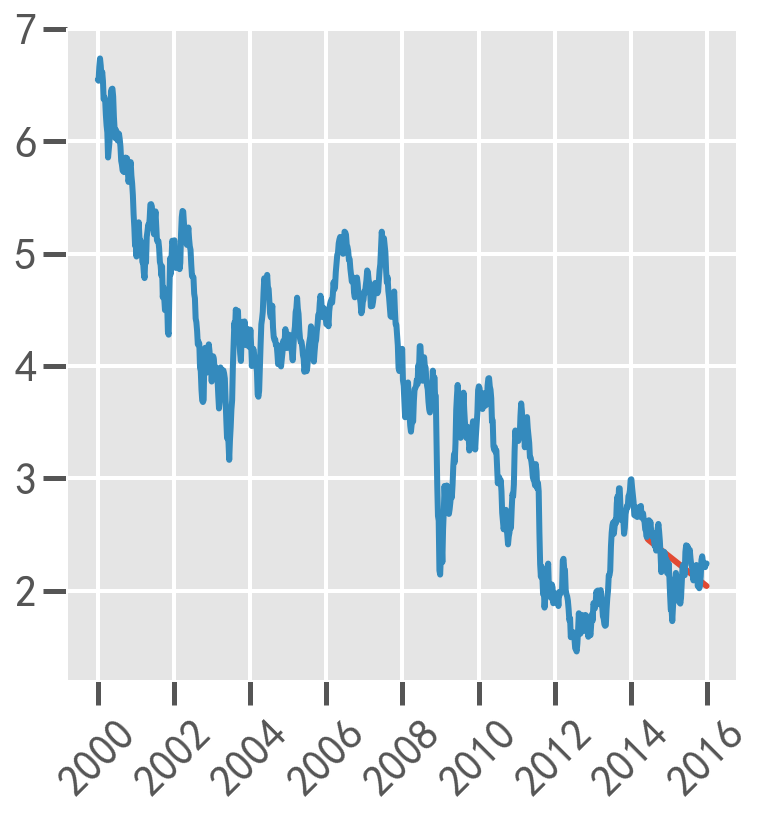

In [31]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')
result = model.fit()
pred = result.predict('20140609',dynamic=True, typ='levels')
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)